In [1]:
!python --version

Python 3.7.13


In [ ]:
!pip -q install geopandas
!pip -q install rasterio

!pip -q install -U scikit-learn
!pip -q install bottleneck
!pip -q install pycaret


In [3]:
import rasterio
from tqdm.auto import tqdm
from rasterio import plot
from pathlib import Path
import matplotlib.pyplot as plt  
import geopandas as gpd
import pycaret
import glob
import os
import numpy as np
import pandas as pd
import pickle as pkl
from pycaret.utils import enable_colab
enable_colab()
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline
from rasterio.mask import mask

Colab mode enabled.


In [4]:
data_path = "/content/drive/MyDrive/2022_ARV_Coconuts/"

In [5]:
root_data_path = Path(data_path)

In [6]:
image_path = root_data_path.joinpath("2021/")

In [10]:
AOI_Test_DATA = root_data_path.joinpath("/content/testdata.shp")
shapefile = gpd.read_file(AOI_Test_DATA.as_posix())
shapefile

DriverError: ignored

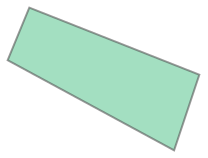

In [ ]:
shapefile['geometry'][1]

In [ ]:
def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    # print(xx,yy,h,w,a,aa,b,bb)

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')


In [ ]:
band4 = rasterio.open("/content/drive/MyDrive/2022_ARV_Coconuts/2021/20210327/IMG_DATA/47PQS_20210327_B04.jp2",driver="JP2OpenJPEG")
band8 = rasterio.open("/content/drive/MyDrive/2022_ARV_Coconuts/2021/20210327/IMG_DATA/47PQS_20210327_B08.jp2",driver="JP2OpenJPEG")

In [ ]:
red = band4.read(1).astype('float64')
nir = band8.read(1).astype('float64')

No handles with labels found to put in legend.


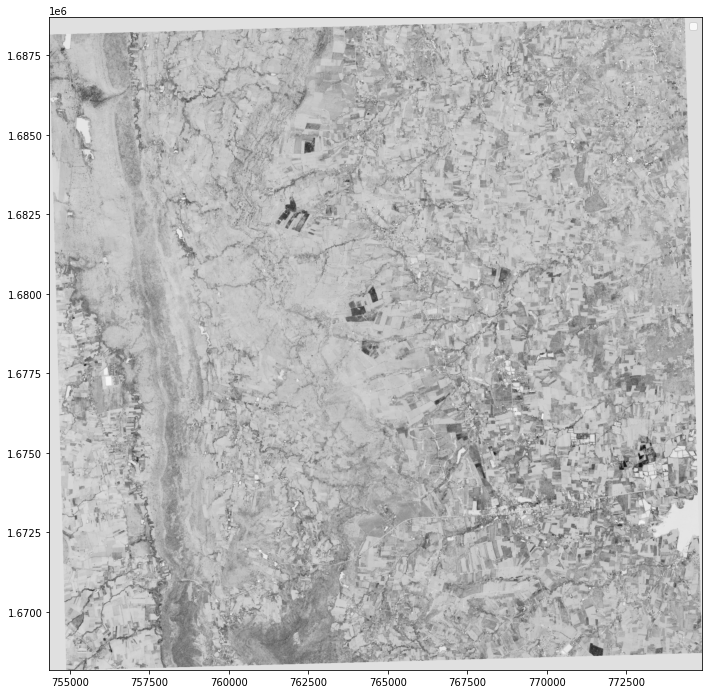

In [ ]:
ndvi = rasterio.open('/content/msavi_20210327.tiff')
fig = plt.figure(figsize=(18,12))
plt.legend()
plot.show(ndvi,cmap="Greys")

In [ ]:
ndvi = rasterio.open('/content/msavi_20210327.tiff')
out_features = []
for i in tqdm(range(0,1317)):
   out, transformed = mask(ndvi, shapefile['geometry'][i:i+1], crop=True, filled=True)
   x = padding(out[0], 80, 80)
   out_features.append(x)
out_ = np.array(out_features)
feature = np.reshape(out_,(1317,(80*80)))
print(feature.shape)

with open("/content/drive/MyDrive/2022_ARV_Coconuts/msavi_feature_2D_20210327.pkl","wb") as f:
  pkl.dump(feature ,f)

In [ ]:
ndvi = rasterio.open('/content/mdvi_20210327.tiff')
out_features = []
for i in tqdm(range(0,1317)):
   out, transformed = mask(ndvi, shapefile['geometry'][i:i+1], crop=True, filled=True)
   x = padding(out[0], 80, 80)
   out_features.append(x)
out_ = np.array(out_features)
feature = np.reshape(out_,(1317,(80*80)))
print(feature.shape)

with open("/content/drive/MyDrive/2022_ARV_Coconuts/mdvi_feature_2D_20210327.pkl","wb") as f:
  pkl.dump(feature ,f)

In [ ]:
ndvi = rasterio.open('/content/mdwi_20210327.tiff')
out_features = []
for i in tqdm(range(0,1317)):
   out, transformed = mask(ndvi, shapefile['geometry'][i:i+1], crop=True, filled=True)
   x = padding(out[0], 80, 80)
   out_features.append(x)
out_ = np.array(out_features)
feature = np.reshape(out_,(1317,(80*80)))
print(feature.shape)

with open("/content/drive/MyDrive/2022_ARV_Coconuts/mdwi_feature_2D_20210327.pkl","wb") as f:
  pkl.dump(feature ,f)